<a href="https://colab.research.google.com/github/lightituphome/Calorie-Exercise/blob/main/Calorie_%26_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
from google.colab import files
files.upload()

Saving calories.csv to calories.csv


{'calories.csv': b'User_ID,Calories\r\n14733363,231.0\r\n14861698,66.0\r\n11179863,26.0\r\n16180408,71.0\r\n17771927,35.0\r\n15130815,123.0\r\n19602372,112.0\r\n11117088,143.0\r\n12132339,134.0\r\n17964668,72.0\r\n13723164,3.0\r\n13681290,92.0\r\n15566424,58.0\r\n12891699,88.0\r\n13823829,7.0\r\n17557348,170.0\r\n12198133,11.0\r\n15236104,43.0\r\n11042324,15.0\r\n16864285,74.0\r\n11674347,29.0\r\n19797300,32.0\r\n14711095,10.0\r\n14434854,155.0\r\n14893804,3.0\r\n17231597,24.0\r\n10901446,12.0\r\n15874362,10.0\r\n15569252,195.0\r\n15615743,5.0\r\n13363046,69.0\r\n17572853,136.0\r\n17157339,80.0\r\n18328111,107.0\r\n19303479,200.0\r\n10699201,56.0\r\n15283313,50.0\r\n16324247,100.0\r\n14277710,200.0\r\n10888188,4.0\r\n13379795,70.0\r\n17181524,127.0\r\n15988442,197.0\r\n19538533,113.0\r\n14591877,11.0\r\n14274480,82.0\r\n16818429,26.0\r\n17476522,141.0\r\n16369885,92.0\r\n17816292,5.0\r\n15995398,30.0\r\n17615432,3.0\r\n10146087,37.0\r\n17967445,147.0\r\n19670291,8.0\r\n10580576,159.0\r

In [ ]:
calories=pd.read_csv('calories.csv')

In [ ]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
from google.colab import files
files.upload()

Saving exercise.csv to exercise.csv


{'exercise.csv': b'User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp\r\n14733363,male,68,190.0,94.0,29.0,105.0,40.8\r\n14861698,female,20,166.0,60.0,14.0,94.0,40.3\r\n11179863,male,69,179.0,79.0,5.0,88.0,38.7\r\n16180408,female,34,179.0,71.0,13.0,100.0,40.5\r\n17771927,female,27,154.0,58.0,10.0,81.0,39.8\r\n15130815,female,36,151.0,50.0,23.0,96.0,40.7\r\n19602372,female,33,158.0,56.0,22.0,95.0,40.5\r\n11117088,male,41,175.0,85.0,25.0,100.0,40.7\r\n12132339,male,60,186.0,94.0,21.0,97.0,40.4\r\n17964668,female,26,146.0,51.0,16.0,90.0,40.2\r\n13723164,female,36,177.0,76.0,1.0,74.0,37.8\r\n13681290,female,21,157.0,56.0,17.0,100.0,40.0\r\n15566424,male,66,171.0,79.0,11.0,90.0,40.0\r\n12891699,female,32,157.0,54.0,18.0,93.0,40.4\r\n13823829,male,53,182.0,85.0,2.0,82.0,38.1\r\n17557348,female,39,156.0,62.0,28.0,104.0,40.8\r\n12198133,male,39,182.0,82.0,4.0,82.0,38.6\r\n15236104,male,46,169.0,67.0,11.0,89.0,40.2\r\n11042324,female,27,171.0,65.0,4.0,85.0,38.6\r\n16864285,male,50,18

In [ ]:
exercise=pd.read_csv('exercise.csv')

In [ ]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combining the two dataframes

In [ ]:
data=pd.concat([exercise,calories['Calories']],axis=1)

In [ ]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
data.tail()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0
14999,11751526,male,63,173.0,79.0,18.0,92.0,40.5,98.0


In [ ]:
data.shape

(15000, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [ ]:
data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Data Analysis

In [ ]:
data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Data Visualisation

In [ ]:
sns.set()

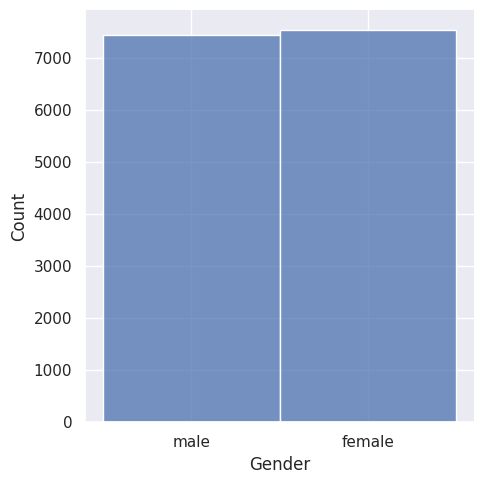

In [ ]:
sns.displot(data['Gender'])

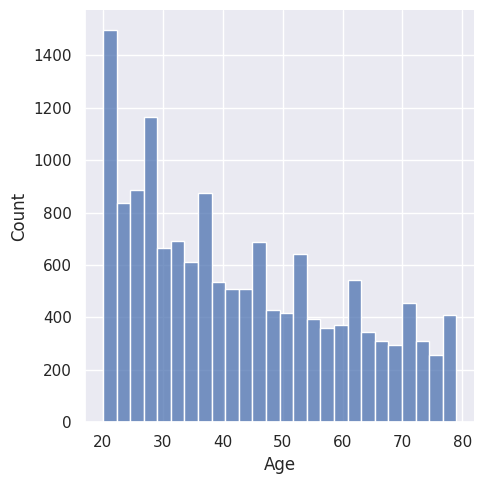

In [ ]:
sns.displot(data['Age'])

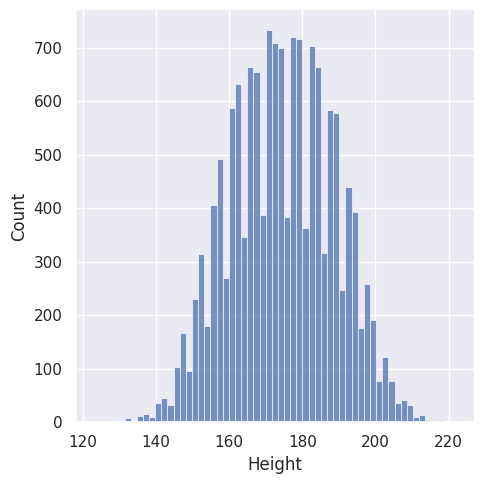

In [ ]:
sns.displot(data['Height'])

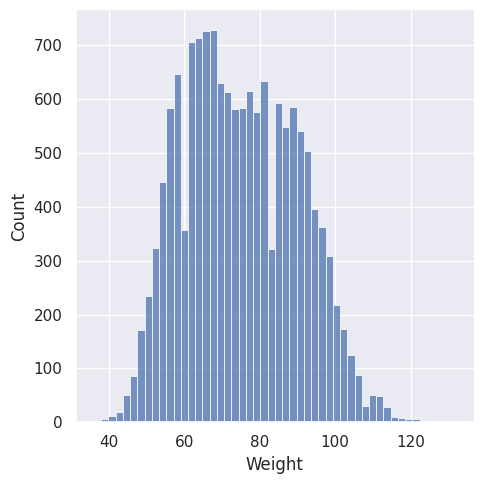

In [ ]:
sns.displot(data['Weight'])

Finding Correlation in the data set

1.Positive Correlation


2.Negative correlation

In [ ]:
correlation=data.corr()

<ipython-input-21-7f2487af4b08>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=data.corr()


<Axes: >

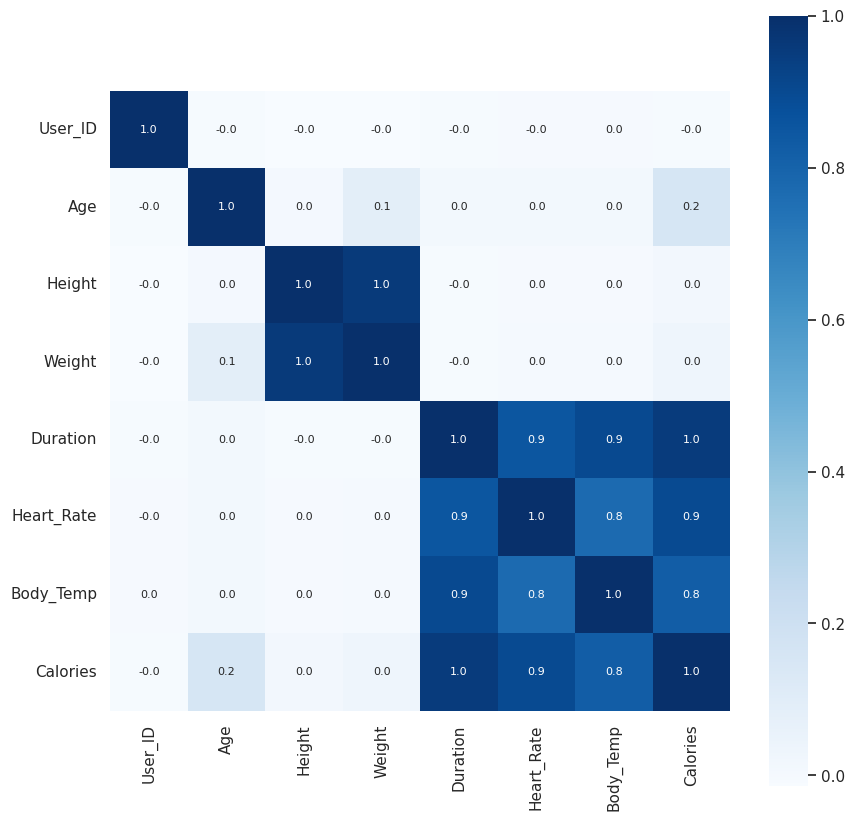

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

Converting the text Data to numerical values

In [ ]:
data.replace({'Gender':{'male':0,'female':1}},inplace=True)

In [ ]:
data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


Separating features and Target

In [ ]:
x=data.drop(columns=['User_ID','Calories'],axis=1)
y=data['Calories']

In [ ]:
print(x)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [ ]:
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


Splitting the data into training data and testing data

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Machine Learning Model Training

XGBoost Regressor

In [ ]:
regressor = XGBRegressor()

In [ ]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluation

Prediction on test data

In [ ]:
test_data_prediction=regressor.predict(x_test)

In [ ]:
print(test_data_prediction)

[127.823784 226.00154   38.66253  ... 144.3636    22.767195  89.87375 ]


Mean Absolute Error

In [ ]:
mean=metrics.mean_absolute_error(y_test,test_data_prediction)

In [ ]:
print('Mean Absolute Error =',mean)

Mean Absolute Error = 1.4807048829992613
